In [107]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [108]:
# read data sets
train_df = pd.read_csv('quasar_train.csv', header=0)
test_df = pd.read_csv('quasar_test.csv', header=0)

print(train_df.shape)
print(train_df.iloc[:5, :5])
print('\n')
print(test_df.shape)
print(test_df.iloc[:5, :5])

(200, 450)
   1150.000  1151.000  1152.000  1153.000  1154.000
0     0.629     1.910     0.976     2.161     0.964
1    -0.161     1.830     0.609     1.932     0.932
2    -0.085    -1.304     0.691    -0.800    -1.090
3     1.283    -0.487     0.660     0.167    -1.217
4    -0.107     0.328     0.681     2.500     0.083


(50, 450)
   1150.00  1151.00  1152.00  1153.00  1154.00
0    0.025    1.460   -0.057     1.37    2.090
1    1.210    0.375    0.695    -0.09    0.275
2    1.380   -0.436    2.700     1.18    1.850
3    0.427    0.509    1.060     0.80    0.537
4   -0.371    0.773   -0.621     1.84    0.284


In [109]:
x1 = list(train_df.columns)
x1 = list(map(float, x1))

X_df = DataFrame({'x0' : np.ones(len(x1)),
               'x1' : x1})
X = X_df.values
y = train_df.iloc[0, :].values

print(X[:5])
print(y[:5])

[[1.000e+00 1.150e+03]
 [1.000e+00 1.151e+03]
 [1.000e+00 1.152e+03]
 [1.000e+00 1.153e+03]
 [1.000e+00 1.154e+03]]
[0.629 1.91  0.976 2.161 0.964]


In [110]:
# to apply OLS on the first non-header row
# apply the normal equation
theta = np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)
print(theta.shape)
print(theta)

(2,)
[ 2.51339906e+00 -9.81122145e-04]


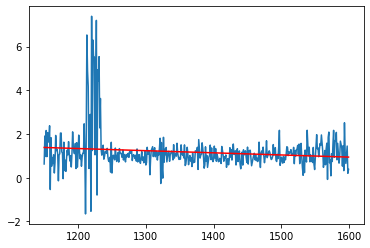

In [111]:
# plot the figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(X_df['x1'], y)

# and plot the straight line
y_pred = theta[0] + theta[1] * X_df['x1']
ax.plot(X_df['x1'], y_pred, color='red')

In [120]:
# apply local weighted linear regression
theta_list = []
print(X_df.head(5))
print(y[:5])

N = X_df.shape[0]
tol = 5

for i in range(N):
    curr_x = X_df.iloc[i, 1]
    curr_W = np.zeros((N, N))

    # calculate curr_W
    for k in range(N):
        curr_x_k = X_df.iloc[k, 1]
        curr_W[k, k] = np.exp(-((curr_x - curr_x_k)**2) / (2 * (tol ** 2)))

    # calculate the current theta
    curr_theta = np.linalg.inv((X.T.dot(curr_W).dot(X))).dot(X.T).dot(curr_W).dot(y)

    # add the curr_theta into theta_list
    theta_list.append(curr_theta)

# print(theta_list)

    x0      x1
0  1.0  1150.0
1  1.0  1151.0
2  1.0  1152.0
3  1.0  1153.0
4  1.0  1154.0
[0.629 1.91  0.976 2.161 0.964]


In [127]:
# calculate the predictive y's
y_pred = np.zeros(N)
# print(y_pred)

for i in range(N):
    y_pred[i] = np.dot(X_df.iloc[i, :], theta_list[i])

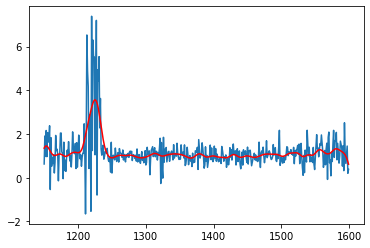

In [128]:
# plot the figure
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(X_df['x1'], y)

# and plot the straight line
ax.plot(X_df['x1'], y_pred, color='red')